#  исследование сообщений в каналах

**цель**-выявить тенеденции во время общения студентов в slack

**задачи:**
- исследовать студентов 
    - найти кто больше всех пишет
    - кто больше создает треды
- исследовать сообщения
    - построить распределение сообщений по тредам и каналам
    - найти среднюю длину сообщения и ее изменение в зависимости от канала
    - найти пльзователей которые пишут самые длинные сообщения
- исследовать каналы 
    - определить в каких каналах больше всего сообщений
    - определить в каких каналах количество сообщених на тред максимальное

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## предобработка данных

In [2]:
exerciser=pd.read_csv('da_21_exerciser.csv')
info=pd.read_csv('da_21_info.csv')
library=pd.read_csv('da_21_library.csv')
projects=pd.read_csv('da_21_projects.csv')
teamwork=pd.read_csv('da_21_teamwork.csv')
exerciser_1=pd.read_csv('archive_da_21_exerciser_1.csv')
exerciser_2=pd.read_csv('archive_da_21_exerciser_2.csv')
projects_1=pd.read_csv('archive_da_21_projects_1.csv')
projects_2=pd.read_csv('archive_da_21_projects_2.csv')

добавим столбец с названием канала

In [3]:
def chanel(df, chan):
    df['chanel']=chan
    
chanel(exerciser, 'exerciser')
chanel(info, 'info')
chanel(library, 'library')
chanel(projects, 'projects')
chanel(teamwork, 'teamwork')
chanel(exerciser_1, 'exerciser')
chanel(exerciser_2, 'exerciser')
chanel(projects_2, 'projects')
chanel(projects_1, 'projects')

объединим датасеты

In [4]:
dfs=[exerciser, info, library, projects, teamwork, exerciser_1, exerciser_2, projects_1, projects_2]
df=pd.concat(dfs)
display(df.head())
display(df.info())

,thread_ts,ts,user,text,reactions,real_name,chanel
0,NaN,1.619415e+09,U017GEA41TP,*<!channel> приветствую вас в канале `da_21_ex...,"[{'name': 'cat-high-five', 'users': ['U01FDV9F...",Валентина Султанова,exerciser
1,1.619642e+09,1.619642e+09,U014DELE7UP,"Коллеги, слегка отстала от когорты, потому кид...",NaN,Maria_Kuznetsova,exerciser
2,1.619642e+09,1.619667e+09,U01L656J2KU,<@U014DELE7UP> Привет! У меня ссылка не открыв...,NaN,Алёна Попова,exerciser
3,1.619642e+09,1.619671e+09,U014DELE7UP,<@U01L656J2KU> Доброе утро! Странно.\nСпринт 7...,NaN,Maria_Kuznetsova,exerciser
4,1.619642e+09,1.619671e+09,U01L656J2KU,"<@U014DELE7UP> Покажи код, а то мало входных д...",NaN,Алёна Попова,exerciser


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 0 to 105
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   thread_ts  2122 non-null   float64
 1   ts         2295 non-null   float64
 2   user       2295 non-null   object 
 3   text       2277 non-null   object 
 4   reactions  904 non-null    object 
 5   real_name  2295 non-null   object 
 6   chanel     2295 non-null   object 
dtypes: float64(2), object(5)
memory usage: 143.4+ KB


None

столбец ts содержит дату в unix,
приведем столбец к нужному типу

In [5]:
df['ts']=pd.to_datetime(df['ts'], unit='s')
df['thread_ts']=pd.to_datetime(df['thread_ts'], unit='s')
df.head()

,thread_ts,ts,user,text,reactions,real_name,chanel
0,NaT,2021-04-26 05:32:11.001100032,U017GEA41TP,*<!channel> приветствую вас в канале `da_21_ex...,"[{'name': 'cat-high-five', 'users': ['U01FDV9F...",Валентина Султанова,exerciser
1,2021-04-28 20:26:04.030700032,2021-04-28 20:26:04.030700032,U014DELE7UP,"Коллеги, слегка отстала от когорты, потому кид...",NaN,Maria_Kuznetsova,exerciser
2,2021-04-28 20:26:04.030700032,2021-04-29 03:34:37.030899968,U01L656J2KU,<@U014DELE7UP> Привет! У меня ссылка не открыв...,NaN,Алёна Попова,exerciser
3,2021-04-28 20:26:04.030700032,2021-04-29 04:35:27.031200000,U014DELE7UP,<@U01L656J2KU> Доброе утро! Странно.\nСпринт 7...,NaN,Maria_Kuznetsova,exerciser
4,2021-04-28 20:26:04.030700032,2021-04-29 04:39:24.031399936,U01L656J2KU,"<@U014DELE7UP> Покажи код, а то мало входных д...",NaN,Алёна Попова,exerciser


## исследовательский анализ

### исследование студетов

очистим данные от сообщений преподавателей и кураторов

In [6]:
teachers=['Александр Сушков', 'Елена Эльзессер', 'Валентина Султанова', 'Екатерина Горленко', 'Александр Ольферук',
         'Грант Джагарян', 'Сергей Мокрушин', 'Павел Пляскин', 'Максим Захаров', 'Вячеслав Зотов']

for i in teachers:
    df=df[df['real_name']!=i]

найдем 10 студентов, которые больше всех писали, и посмотрим в какие каналы они писали чаще всего

In [7]:
top_10=df.groupby('real_name', as_index=False).agg({'ts':'count','chanel':'max'}).sort_values(by='ts', 
                                                                                              ascending=False)
top_10=top_10.head(10)
display(top_10)

n=df[df['chanel']=='teamwork'].shape[0]
print(f'всего записей в тимворк = {n}')

,real_name,ts,chanel
24,Алёна Попова,176,teamwork
19,Алексей Овсянников,85,teamwork
17,Алексей Заикин,61,teamwork
70,Марина Медведева,57,teamwork
36,Виктория Большакова,51,teamwork
108,Юля Халеева,47,teamwork
39,Дана Муратбек,47,teamwork
40,Дарина Пономарева,40,teamwork
65,Ксения Ефимова,36,teamwork
59,Илена Фасхутдинова,33,teamwork


всего записей в тимворк = 675


teamwork оказался на удивление популярным, из 2200 тредов на него пришлось 675

найдем пользователей которые создавали треды

In [20]:
treads=df.groupby('thread_ts', as_index=False).agg({'real_name':'min'})
treads=treads.groupby('real_name').agg({'thread_ts':'count'}).sort_values(by='thread_ts',ascending=False)

treads.head(10)

,thread_ts
real_name,
Алёна Попова,51
Алексей Заикин,22
Дана Муратбек,17
Алексей Овсянников,15
Алексей Гумбин,15
Алена Кайгородова,12
Александр Боровцов,9
Виктория Большакова,9
Дарья Грачёва,8


в топе присутствуют теже студенты которые писали больше всех, но и появились новые, которые делали треды но писали немного, скорее всего это были вопросы сверх темы и эти продвинутые студенты обычно не задавали много вопросов по заданиям, поэтому и число сообщений невелико.

построим график распределения количества студентов, которые пишут сообщения, во времени

In [9]:
# студенты, которые делают треды
df['thread_date']=df['thread_ts']
thread_users=df.groupby('thread_date', as_index=False).agg({'real_name':'min'})
thread_users['thread_date']=pd.to_datetime(thread_users['thread_date'], unit='s').dt.date
thread_users=thread_users.groupby('thread_date', as_index=False).agg({'real_name':'count'})
#thread_users

# студенты, которые пишут
active_users=df.groupby('ts', as_index=False).agg({'real_name':'min'})
active_users['date']=active_users['ts'].dt.date
active_users=active_users.groupby('date', as_index=False).agg({'real_name':'count'})
#active_users.head()

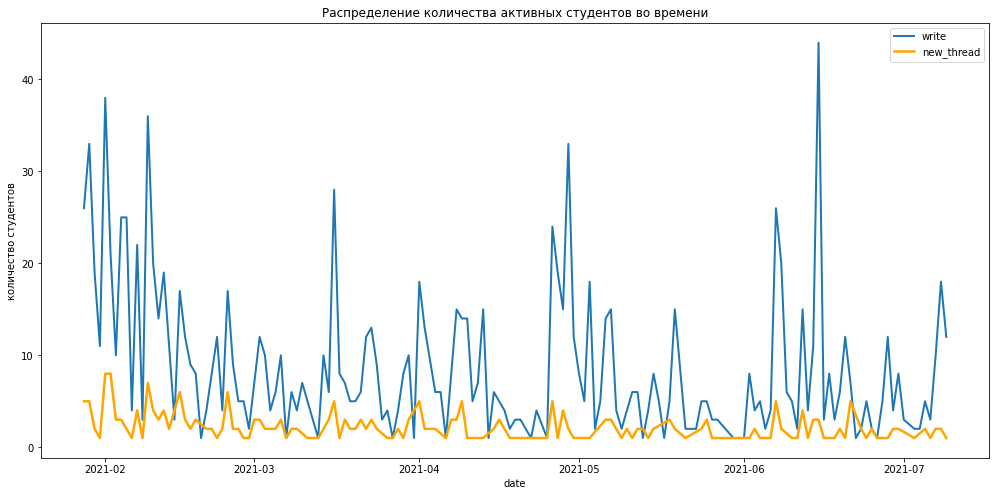

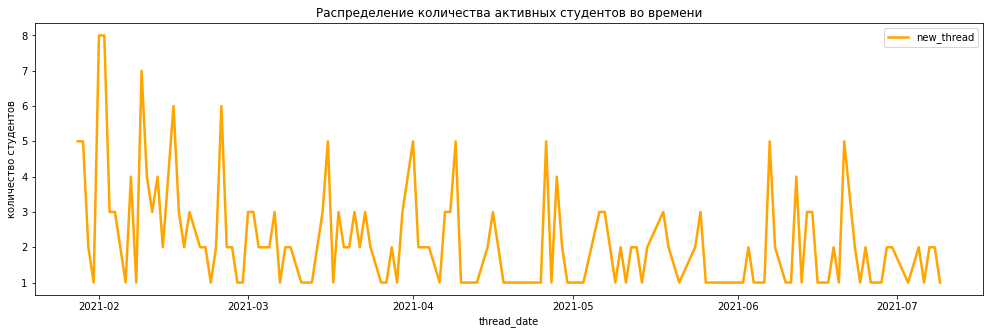

In [10]:
#график
plt.figure(figsize=(17, 8))
sns.lineplot(data=active_users, x='date', y='real_name', linewidth=2, label='write')
sns.lineplot(data=thread_users, x='thread_date', y='real_name', linewidth=2.5, color='orange', label='new_thread')
plt.title('Распределение количества активных студентов во времени')
plt.ylabel('количество студентов')
plt.show()

#график
plt.figure(figsize=(17, 5))
sns.lineplot(data=thread_users, x='thread_date', y='real_name', linewidth=2.5, color='orange', label='new_thread')
plt.title('Распределение количества активных студентов во времени')
plt.ylabel('количество студентов')
plt.show()

наблюдается всплеск количества пишущих студентов примерно каждые 1,5 месяца и имеет растущий тренд. а число студентов, которые делают треды со временем уменьшеается

### исследование сообщений

определим какие каналы имеют больше всего тредов

In [11]:
#функция делающая группировку по каналу
def group_sort(col2):
    i=df.groupby('chanel').agg({col2:'count'}).sort_values(by=col2,
                                                            ascending=False).T.style.background_gradient(axis=None, 
                                                                                                         cmap='Blues')
    display(i)
group_sort('thread_ts')

chanel,teamwork,info,projects,exerciser,library
thread_ts,623,270,249,139,11


больше всего тредов, как и сообщений находится в teamwork

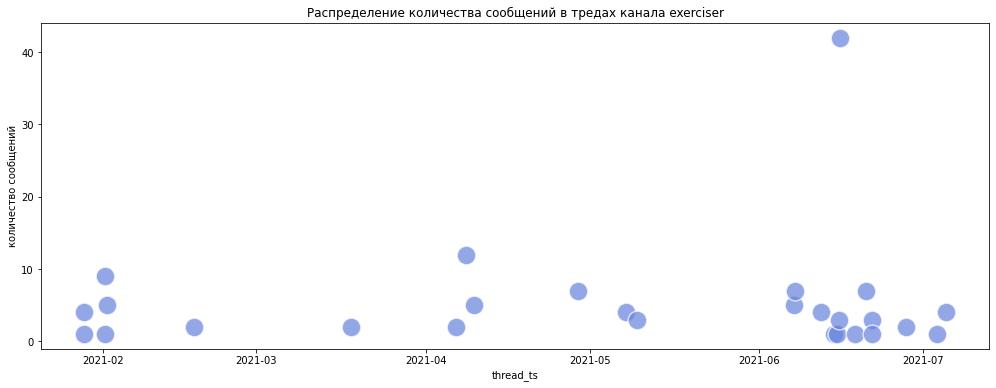

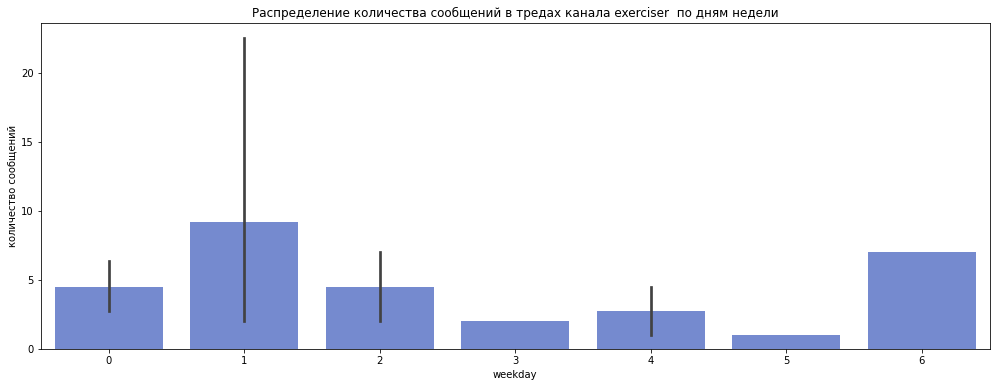

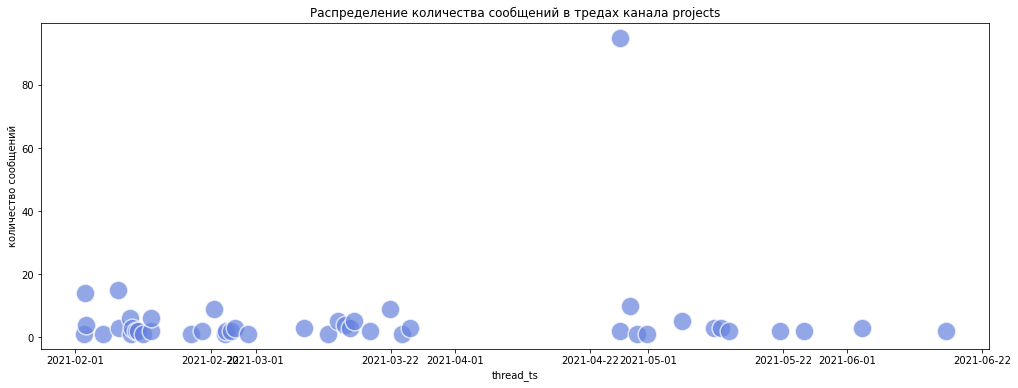

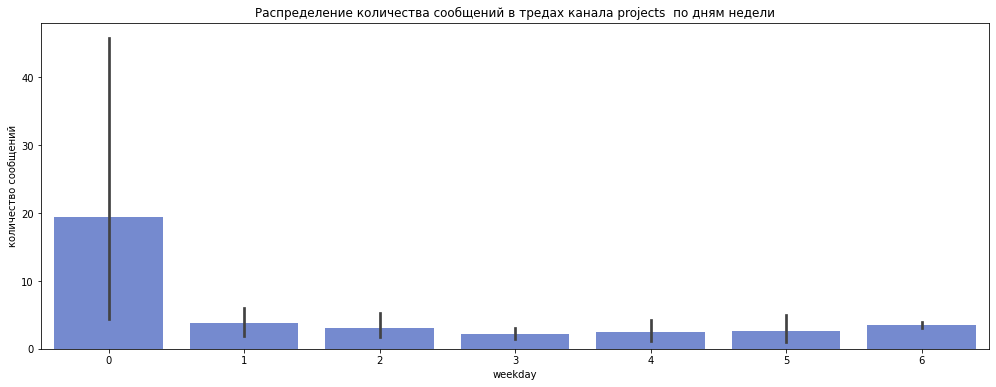

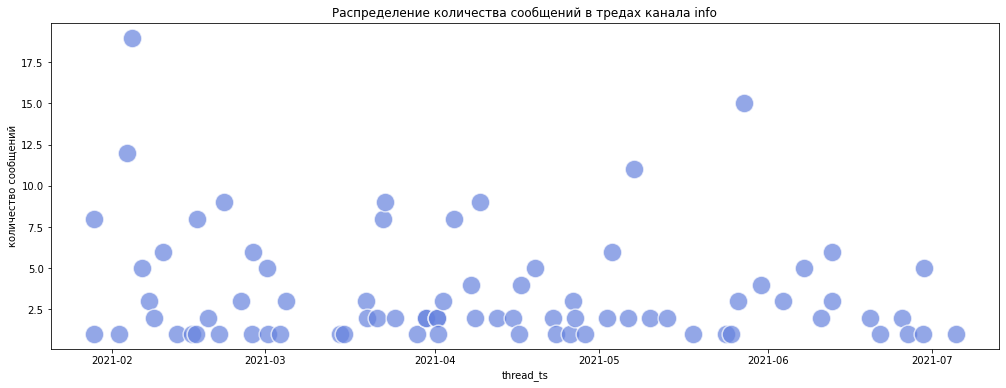

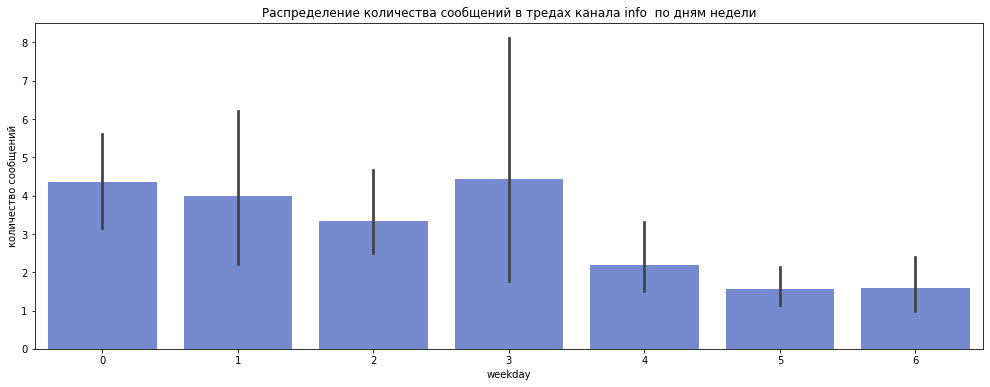

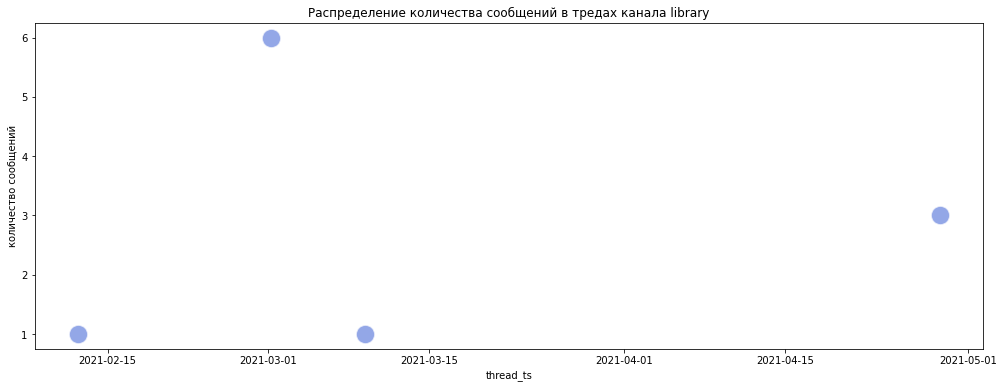

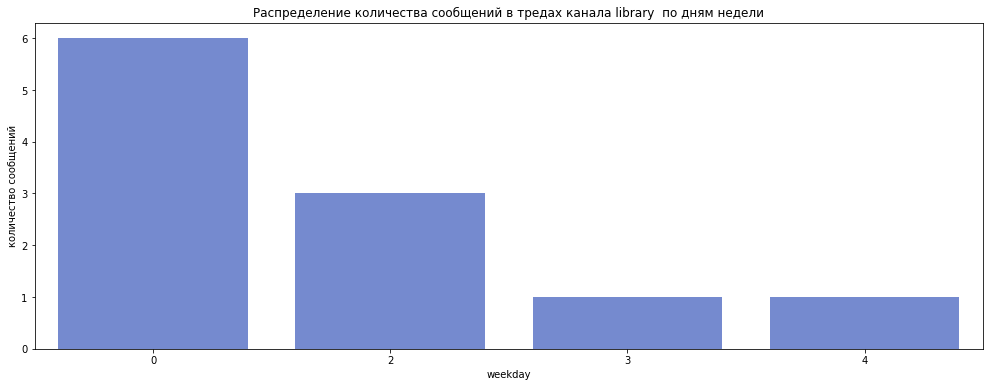

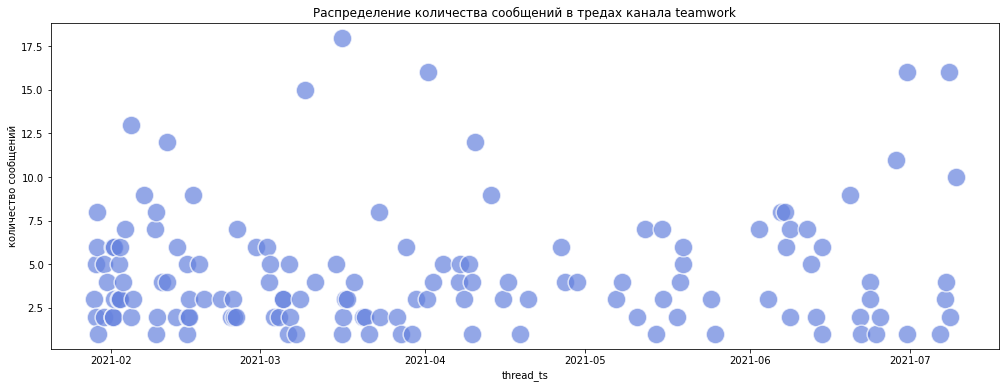

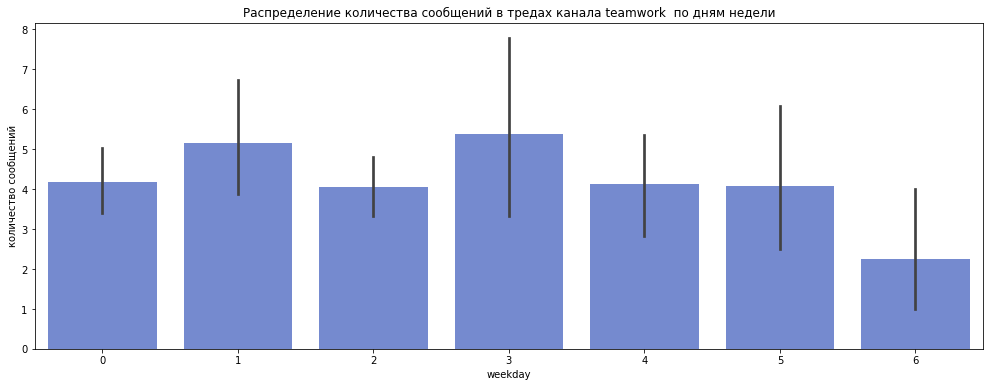

In [12]:
df['date']=df['ts'].dt.date 
df['weekday']=df['ts'].dt.dayofweek

#группированные данные по тредам
mes_by_tread=df.groupby('thread_ts', as_index=False).agg({'ts':'count', 'chanel':'min','weekday':'min'})

chanels=['exerciser', 'projects', 'info', 'library', 'teamwork']
for i in chanels:
    df1=mes_by_tread[mes_by_tread['chanel']==i]

    plt.figure(figsize=(17, 6))
    sns.scatterplot(data=df1, x='thread_ts', y='ts', color='#6682de', s=350, alpha=0.7)
    plt.title(f'Распределение количества сообщений в тредах канала {i}')
    plt.ylabel('количество сообщений')
    plt.show()
    
    plt.figure(figsize=(17, 6))
    sns.barplot(data=df1, x='weekday', y='ts', color='#6682de')
    plt.title(f'Распределение количества сообщений в тредах канала {i}  по дням недели')
    plt.ylabel('количество сообщений')
    plt.show()

**в течение периода**

сообщения в тредах каналов projects и exerciser располагаются кучками с периодичностью раз в 2-3 надели и обычно не превышают  10 сообщений в треде. есть всплекс в exerciser во время спринта по автоматизации (середина июня), т.к. лагал сервер и аналогичный всплеск в канале projects во время проектов по бизнес показателям, т.к. эта тема далась с трудом.

в канале инфо количество сообщений в тредах уменьшается во времением, есть всплеск в начале периода, т.к. студенты только начинали привыкать к практикуму и возникало много вопросов и в начале июня, т.к. многие студенты не успевали доделать 2 блок и возникали вопросы на счет академа.

в тимворк сообщения в тредах распределены довольно равномерно по всему периоду, есть всплеск в марте и начале апреля, т.к. там был 1 сборный проект и каникулы, было больше времени на общение по внеучебным вопросам

в канале library всего 4 треда, больше сообщений было в начале периода

**в течение недели**

больше всего сообщений в тредах канала exerciser оставляи во вт, т.к. за пн студенты успевали ознакомиться с заданиями и дойти до достаточного уровня сложности, чтобы возникли типовые вопросы, которыми впоследствии пользовались остальные участники. также много вопросов задавали в воскресенье т.к. поджимали дедлайны

в канале projects больше всего сообщений в тредах было в пн, т.к. часто возникали вопросы о данных и предобрабоке

в тимворке сообщения по неделе распределены довольно равномерно, чуть больше среднего пишут в чт. и реже среднего в вс, возможно потому что судорожно закрывают дедлайны

--------------------------------------------------------------------------------------------------------------------
найдем треды с наибольшим количеством сообщений

In [13]:
threads_mes=df.groupby('thread_ts', as_index=False).agg({'ts':'count', 'chanel':'unique'}).sort_values(by='ts',
                                                                                           ascending=False)
threads_mes.head(10)

,thread_ts,ts,chanel
193,2021-04-26 15:32:50.022799872,95,[projects]
260,2021-06-15 20:58:42.127300096,42,[exerciser]
32,2021-02-04 13:11:13.131099904,19,[info]
125,2021-03-16 08:39:46.002500096,18,[teamwork]
289,2021-07-08 07:00:03.222500096,16,[teamwork]
158,2021-04-01 13:11:18.131900160,16,[teamwork]
282,2021-06-30 10:13:24.172899840,16,[teamwork]
39,2021-02-07 14:16:47.062099968,15,[projects]
114,2021-03-09 09:02:19.139699968,15,[teamwork]
234,2021-05-27 14:25:15.027399936,15,[info]


больше всего сообщений в треде Михаила Кузнецова по анализу бизнес-метрик, далее с большим отрывом тред Олеси Лозинской о работе в Табло, остальные треды менее популярны.

найдем среднюю длину сообщений в каждом канале

In [14]:
df['text_len']=df['text'].str.count(" ") + 1
mean_text=df.groupby('chanel').agg({'text_len':'mean'}).sort_values(by='text_len',ascending=False)
mean_text

,text_len
chanel,
teamwork,31.681548
projects,25.262097
info,23.463504
exerciser,22.187050
library,11.238095


самые длинные сообщения в тимворке (32 слова), там обычно пишут длинноые доп вопросы преподавателям, а также Сергей Мокрушин пишет объемные напутственные слова. а самые короткие в libruary (11 слов), т.к. основа сообщения это ссылка на какой-то источник. в проектах, инфо и эксерсайзер примерно равные (25 - 22 слова)

найдем студентов, которые пишут самые длинные сообщения

In [15]:
max_text_student=df.groupby('real_name').agg({'text_len':'mean'}).sort_values(by='text_len',ascending=False)
max_text_student.head(10)

,text_len
real_name,
Павел Борисов,110.000
Nikita Bergman,99.625
Александр Лебедев,85.000
Елена Волкова,76.000
Лена Силуянова,71.500
Евгения Шишкина,68.000
Андрей Самоделов,64.000
Андрей Касинец,60.500
Сергей Артамонов,53.000


авторы самых длинных сообщений не были замечены среди самых активных писателей, они пишут много но не часто, за счет чего средняя остается большой

### исследование каналов

найдем каналы с набольшим числом сообщений

In [16]:
group_sort('ts')

chanel,teamwork,info,projects,exerciser,library
ts,675,274,251,143,21


с большим отрывом больше всего сообщений также в тимворк, а меньше всего в library. 

найдем среднее количество сообщений в треде по каналам

In [17]:
mes_on_tread=df.groupby('thread_ts', as_index=False).agg({'ts':'count', 'chanel':'max'}).sort_values(by='ts',ascending=False)
mes_on_tread=mes_on_tread.groupby('chanel').agg({'ts':'mean'}).sort_values(by='ts',ascending=False)
mes_on_tread.head()

,ts
chanel,
projects,5.533333
exerciser,5.148148
teamwork,4.482014
info,3.506494
library,2.750000


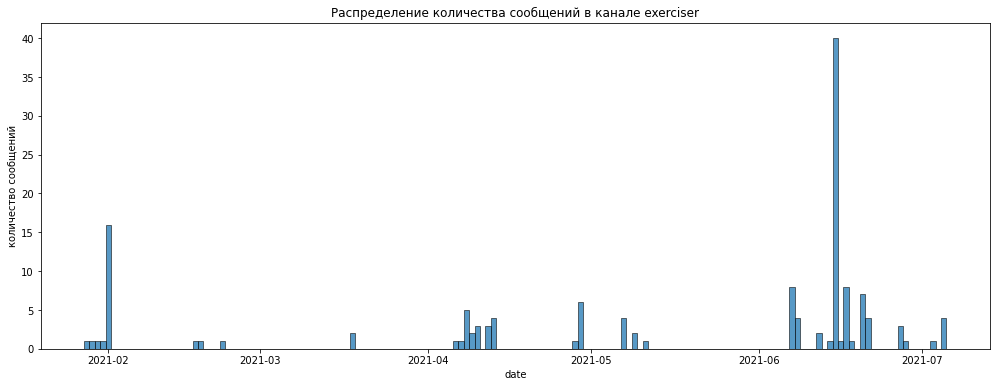

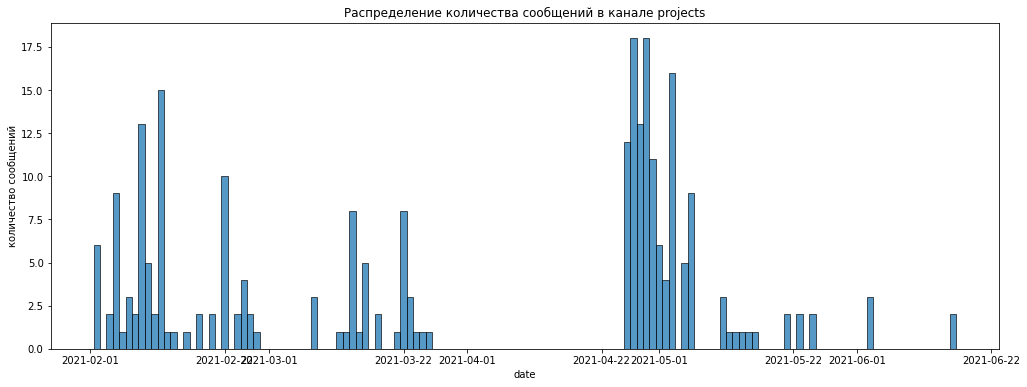

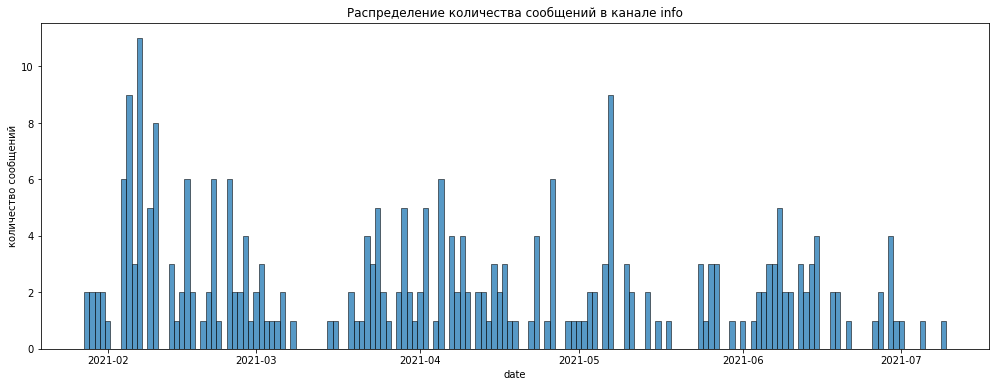

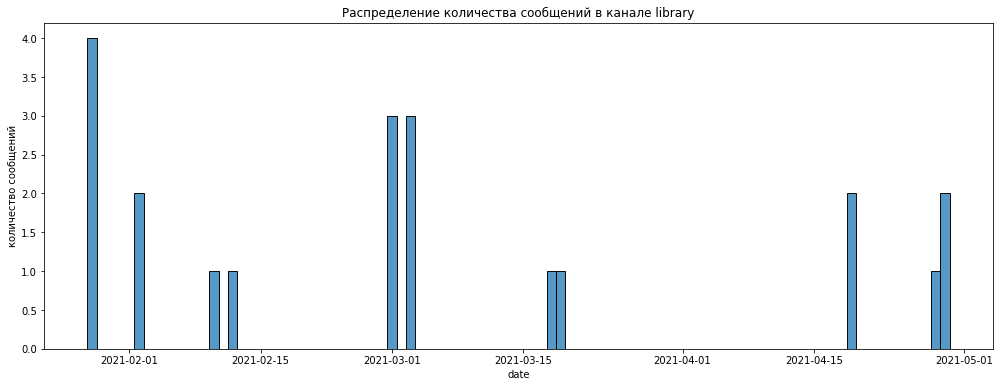

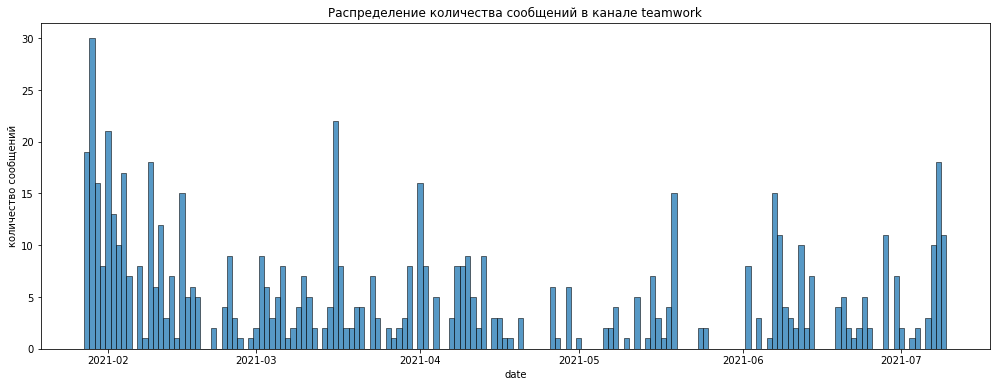

In [18]:
chanels=['exerciser',  'projects', 'info', 'library', 'teamwork']
for i in chanels:
    df1=df[df['chanel']==i]

    plt.figure(figsize=(17, 6))
    sns.histplot(data=df1, x='date')
    plt.title(f'Распределение количества сообщений в канале {i}')
    plt.ylabel('количество сообщений')
    plt.show()

в канале exerciser сообщения появлялись с переодичностью раз в 2 недели, во время прохождения тренажера. в середине июня всплеск активности, студенты запутались в спринте про автоматизацию

также в треде проекты есть переодичность связанная с выполнением проектов, и всплеск на проекте про бизнес-метрики.

в тереде инфо,со временем число сообщений уменьшается, т.к. необходимость социализировать студентов и число новостей уменьшаются.

в тимворке на всем протяжении количество сообщений примерно равно, в начале периода был всплеск, т.к. студеты знакомились и писали о себе. со время проекта по бизнес-метрикам и после него, наблюдается небольшой спад активности, это студенты доделывают проект и следующий спринт.

## вывод

**студенты**

самыми активно пишущими студентами стали Алёна Попова, Алексей Овсянников, Алексей Заикин (наверное следует изучить влияние буквы А в имени на активность человека😏). однако в среднем самые длинные сообщения пишут студенты не попавшие в топ по числу сообщений, т.е. в среднем пишут либо часто и коротки либо мало и объемно.

создают треды в основном много пишущие студенты (в топ-5 попали Алена и Алексеи), но есть и те, которые пишут не много (Алексей Гумбин, Алена Кайгородова,Александр Боровцов, Виктория Большакова), скорее всего это были вопросы сверх темы и эти продвинутые студенты обычно не задавали много вопросов по заданиям, поэтому и число сообщений невелико.

наблюдается всплеск количества пишущих студентов примерно каждые 1,5 месяца и имеет растущий тренд. а число студентов, которые делают треды со временем уменьшеается

**каналы**

самый популярный канал - teamwork, в нем 623 треда и 675 сообщения. самый непопулярный канал library - 11 тредов и 21 сообщение. также в тимворке самые длинные сообщения (32 слова), там обычно пишут длинноые доп вопросы преподавателям, а также Сергей Мокрушин пишет объемные напутственные слова. а самые короткие в libruary (11 слов), т.к. основа сообщения это ссылка на какой-то источник. в проектах, инфо и эксерсайзер примерно равные (25 - 22 слова)

в среднем количество сообщений в треде больше всего в канаде projects (5,5 шт) и exerciser (5 шт), т.к. там часто возникают длительные дискуссии на тему заданий, но есть и пустые треды

**распределение сообщений в течение периода**

сообщения каналов projects и exerciser располагаются кучками с периодичностью раз в 2-3 надели и обычно не превышают  10 сообщений в треде. есть всплекс в exerciser во время спринта по автоматизации (середина июня), т.к. лагал сервер и аналогичный всплеск в канале projects во время проектов по бизнес показателям, т.к. эта тема далась с трудом.

в канале инфо количество сообщений уменьшается во времением, есть всплеск в начале периода, т.к. студенты только начинали привыкать к практикуму и возникало много вопросов и в начале июня, т.к. многие студенты не успевали доделать 2 блок и возникали вопросы на счет академа.

в тимворк сообщения распределены довольно равномерно по всему периоду, есть всплеск в марте и начале апреля, т.к. там был 1 сборный проект и каникулы, было больше времени на общение по внеучебным вопросам

в канале library больше сообщений было в начале периода

**распределение сообщений в течение недели**

больше всего сообщений канала exerciser оставляи во вт, т.к. за пн студенты успевали ознакомиться с заданиями и дойти до достаточного уровня сложности, чтобы возникли типовые вопросы, которыми впоследствии пользовались остальные участники. также много вопросов задавали в воскресенье т.к. поджимали дедлайны

в канале projects больше всего сообщений было в пн, т.к. часто возникали вопросы о данных и предобрабоке

в тимворке сообщения по неделе распределены довольно равномерно, чуть больше среднего пишут в чт. и реже среднего в вс, возможно потому что судорожно закрывают дедлайны